In [4]:
import pandas as pd
import numpy as np
import rrcf
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

##first, build a simulated 2-dimensional dataset
inliers = [[np.random.normal(50, 5, 1), np.random.normal(50, 5, 1)] for i in range(500)]
outliers1 = [[np.random.normal(70, 1, 1), np.random.normal(70, 1, 1)] for i in range(50)]
outliers2 = [[np.random.normal(50, 20, 1), np.random.normal(50, 20, 1)] for i in range(50)]
outliers3 = [[np.random.normal(80, 10, 1), np.random.normal(80, 10, 1)] for i in range(50)]

#merge and reshape the data points
df = inliers + outliers1 + outliers2 + outliers3

v1, v2 , v3 = [i[0] for i in df], [i[1] for i in df], [i[1] for i in df]

df = pd.DataFrame({'v1': v1, 'v2': v2, 'v3' :v3})
df = df = df.sample(frac=1).reset_index(drop=True)
df['v3']= df ['v3'] +2
#df.to_csv('2_D_data.csv')
df.head()

,v1,v2,v3
0,[68.31293738900837],[70.09050496658227],[72.09050496658227]
1,[57.49219413060973],[53.97387429119945],[55.97387429119945]
2,[50.789309550712694],[56.864278946834425],[58.864278946834425]
3,[44.924683403816985],[42.7012137456654],[44.7012137456654]
4,[84.95552273930375],[89.51677108644527],[91.51677108644527]


In [5]:
X_train=df

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train) 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
X_train = pca.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
X_train.shape

(650, 2)

In [7]:
def Rrcf_train(num_trees,tree_size,data_size,train_data):
    tree = rrcf.RCTree(train_data)
    return (tree)

In [8]:
def Rrcf_test1(model,data_size,test_data):  #add index for real data
    for i in range(data_size):
        x=test_data[i]
        model.insert_point(x, index=str(i)+'b')
        
    rrcf_scores =[model.codisp(str(i)+'b') for i in range(data_size)]
    
    return (rrcf_scores)   #return index for real data

In [9]:
def Rrcf_test2(model,data_size,test_data):  
     
    for i in range(data_size):
        x=test_data[i]
        model.insert_point(x, index=str(i)+'b')
   
    rrcf_scores =[model.codisp(str(i)+'b') for i in range(data_size)]
       
    for i in range(data_size):
        x=test_data[i]
        model.forget_point(index=str(i)+'b')
  
    return (rrcf_scores)

In [47]:

import random
random.seed(900)

model= Rrcf_train(50,100,650,X_train)


In [43]:
model

─+
 ├───+
 │   ├───+
 │   │   ├──(603)
 │   │   └──(239)
 │   └──(600)
 └───+
     ├───+
     │   ├───+
     │   │   ├───+
     │   │   │   ├───+
     │   │   │   │   ├──(614)
     │   │   │   │   └───+
     │   │   │   │       ├───+
     │   │   │   │       │   ├──(76)
     │   │   │   │       │   └───+
     │   │   │   │       │       ├───+
     │   │   │   │       │       │   ├──(352)
     │   │   │   │       │       │   └───+
     │   │   │   │       │       │       ├──(480)
     │   │   │   │       │       │       └──(560)
     │   │   │   │       │       └───+
     │   │   │   │       │           ├──(56)
     │   │   │   │       │           └──(410)
     │   │   │   │       └───+
     │   │   │   │           ├──(223)
     │   │   │   │           └───+
     │   │   │   │               ├──(20)
     │   │   │   │               └──(79)
     │   │   │   └───+
     │   │   │       ├───+
     │   │   │       │   ├───+
     │   │   │       │   │   ├──(278)
     │   │   │       │   │   └─

In [44]:
test=X_train

In [45]:
#for live updation of tree when values are streamed

scores = Rrcf_test1(model,650,test)


In [46]:
scores

[25.0,
 7.0,
 2.688311688311688,
 28.272727272727273,
 5.45,
 5.45,
 27.0,
 1.5555555555555556,
 2.688311688311688,
 1.2608695652173914,
 4.8,
 2.5,
 1.8333333333333333,
 2.5,
 8.666666666666666,
 5.45,
 14.25,
 19.5,
 9.2,
 1.8333333333333333,
 19.9,
 3.0,
 4.333333333333333,
 27.0,
 1.967741935483871,
 2.0,
 5.45,
 6.666666666666667,
 5.8,
 1.6076555023923444,
 3.4,
 1.7567567567567568,
 3.625,
 10.923076923076923,
 4.0,
 6.0,
 15.0,
 9.0,
 3.5,
 2.0,
 5.0,
 5.5,
 10.923076923076923,
 2.25,
 8.5,
 2.0,
 4.5,
 2.0,
 2.0588235294117645,
 1.5555555555555556,
 1.7272727272727273,
 4.8,
 2.25,
 5.45,
 6.0,
 2.5,
 19.9,
 2.688311688311688,
 3.5,
 2.4285714285714284,
 2.688311688311688,
 2.0588235294117645,
 5.45,
 16.0,
 4.0,
 5.0,
 5.45,
 3.4,
 5.5,
 28.272727272727273,
 6.0,
 2.5,
 5.45,
 3.0,
 1.2608695652173914,
 2.0,
 19.9,
 2.0,
 32.333333333333336,
 19.9,
 15.833333333333334,
 2.4285714285714284,
 2.6666666666666665,
 6.0,
 5.0,
 8.75,
 2.0,
 3.0,
 3.142857142857143,
 5.8,
 5.0,
 28

In [48]:
# for static tree 

score= Rrcf_test2(model,650,test)


In [49]:
score

[5.227848101265823,
 5.5,
 5.090909090909091,
 2.875,
 5.227848101265823,
 5.227848101265823,
 5.842105263157895,
 4.0,
 5.090909090909091,
 1.375,
 1.0,
 5.842105263157895,
 4.133333333333334,
 2.142857142857143,
 7.0,
 5.842105263157895,
 2.875,
 2.875,
 1.5849056603773586,
 2.875,
 7.951612903225806,
 1.375,
 36.54545454545455,
 5.842105263157895,
 1.048780487804878,
 1.7333333333333334,
 5.227848101265823,
 2.0,
 3.6,
 4.892857142857143,
 5.090909090909091,
 3.0,
 8.333333333333334,
 5.842105263157895,
 4.133333333333334,
 4.892857142857143,
 5.842105263157895,
 7.0,
 7.951612903225806,
 7.951612903225806,
 4.892857142857143,
 4.892857142857143,
 5.842105263157895,
 2.0,
 171.0,
 2.0,
 4.892857142857143,
 2.0,
 5.090909090909091,
 1.75,
 5.842105263157895,
 1.6666666666666667,
 7.951612903225806,
 5.5,
 5.842105263157895,
 5.842105263157895,
 15.0,
 5.090909090909091,
 2.0,
 2.5714285714285716,
 5.842105263157895,
 5.090909090909091,
 5.227848101265823,
 36.54545454545455,
 5.09090

In [50]:
df1 = pd.DataFrame(scores)
#df.to_csv('rf_score.csv',index=False)
df2 = pd.DataFrame(score)


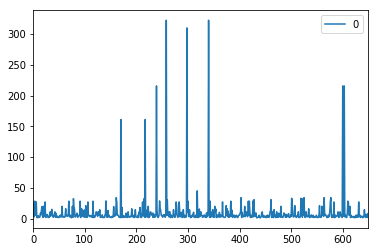

In [52]:

# updating model depending upon the input data

df1.plot()


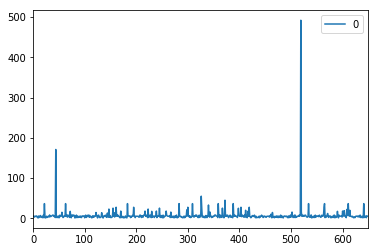

In [53]:
# static model
df2.plot()